In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt

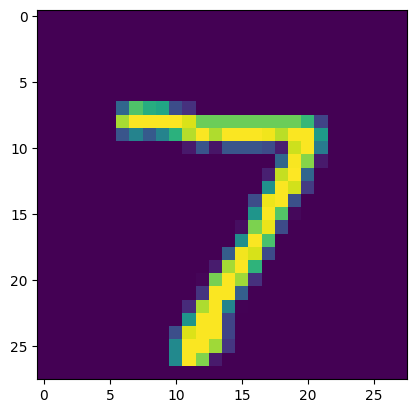

In [2]:
(Xtrain,ytrain),(Xtest,ytest)=keras.datasets.mnist.load_data()

plt.imshow(Xtest[0])
plt.show()

In [3]:
Xtrain = Xtrain/255
Xtest = Xtest/255

md=Sequential()

md.add(Flatten(input_shape=(28,28)))
md.add(Dense(100,activation='relu'))
md.add(Dense(10,activation='softmax'))
md.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
md.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',)

In [5]:
md.fit(Xtrain,ytrain,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2779
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1270
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0884
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0669
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0533
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0426
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0355
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0288
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0239
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0206


In [6]:
yprob=md.predict(Xtest)

313/313 [==============================] - 1s 2ms/step


In [7]:
ypred = yprob.argmax(axis=1)
ypred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [8]:
ytest

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Accuracy Score: 0.9771


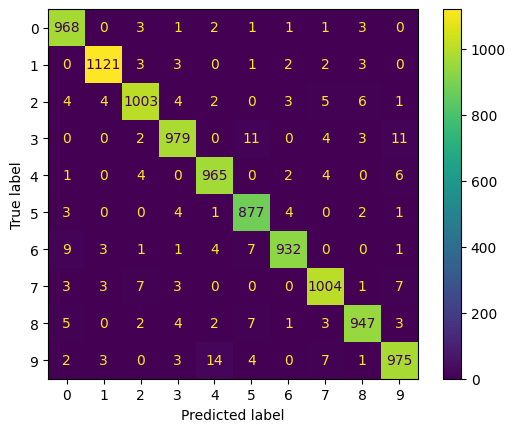

In [9]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
acc=accuracy_score(ytest,ypred)
print("Accuracy Score:",acc)
cm=confusion_matrix(ytest,ypred)
cd=ConfusionMatrixDisplay(confusion_matrix=cm)
cd.plot()